In [ ]:
!pip install statsmodels


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA



In [ ]:
df = pd.read_csv("demand_data.csv")
df.head()


,Date,Value
0,01/01/2022,120
1,01/02/2022,128
2,01/03/2022,133
3,01/04/2022,140
4,01/05/2022,138


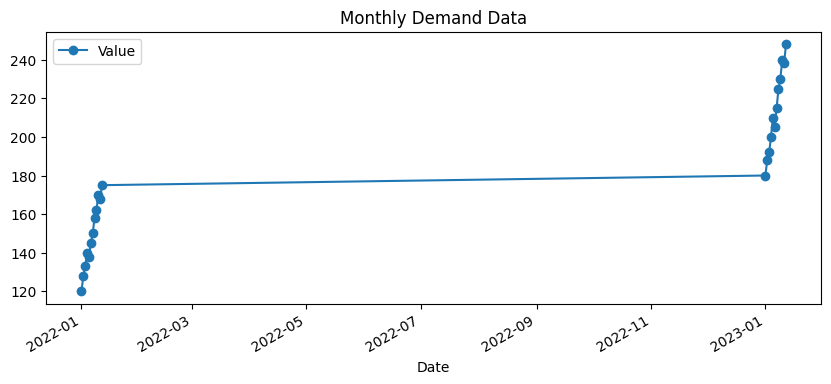

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")

df.plot(figsize=(10,4), title="Monthly Demand Data", marker="o")
plt.show()


In [ ]:
train = df[:-6]
test = df[-6:]

train.tail(), test.head()


(            Value
 Date             
 2023-01-02    188
 2023-01-03    192
 2023-01-04    200
 2023-01-05    210
 2023-01-06    205,
             Value
 Date             
 2023-01-07    215
 2023-01-08    225
 2023-01-09    230
 2023-01-10    240
 2023-01-11    238)

In [ ]:
model = ARIMA(train["Value"], order=(2,1,2))
model_fit = model.fit()
model_fit.summary()



/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/u

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Value   No. Observations:                   18
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 -47.663
Date:                Sat, 29 Nov 2025   AIC                            105.326
Time:                        13:20:38   BIC                            109.492
Sample:                             0   HQIC                           105.740
                                 - 18                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1751      2.284      0.514      0.607      -3.302       5.652
ar.L2         -0.1754      2.295     -0.076      0.939      -4.673       4.322
ma.L1         -1.9366      9.250     -0.209      0.834     -20.066      16.193
ma.L2          0.9732      9.932      0.098      0.922     -18.494      20.440
sigma2        10.2608     77.495      0.132      0.895    -141.627     162.149
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):                 0.07
Prob(Q):                              0.55   Prob(JB):                         0.96
Heteroskedasticity (H):               2.05   Skew:                            -0.15
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

forecast


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


,predicted_mean
18,212.462737
19,218.122408
20,223.463936
21,228.747934
22,234.020144
23,239.288593


In [ ]:
results = pd.DataFrame({
    "Actual": test["Value"],
    "Forecast": forecast
})

results


,Actual,Forecast
2023-01-07 00:00:00,215.0,NaN
2023-01-08 00:00:00,225.0,NaN
2023-01-09 00:00:00,230.0,NaN
2023-01-10 00:00:00,240.0,NaN
2023-01-11 00:00:00,238.0,NaN
2023-01-12 00:00:00,248.0,NaN
18,NaN,212.462737
19,NaN,218.122408
20,NaN,223.463936
21,NaN,228.747934


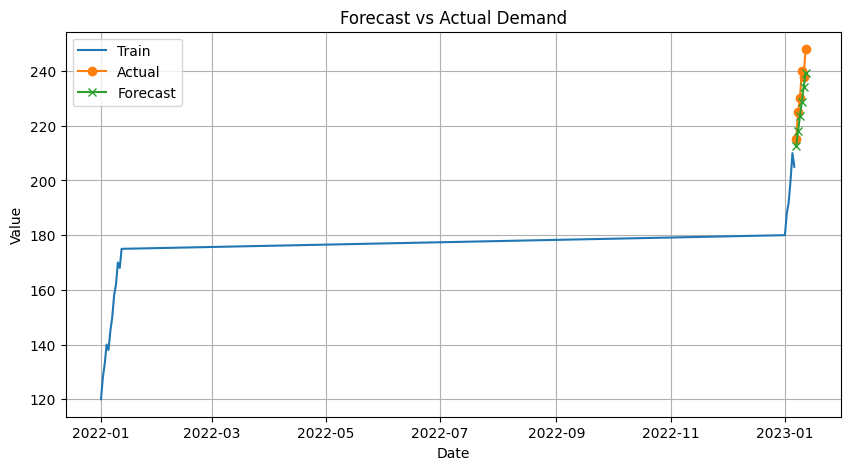

In [ ]:
plt.figure(figsize=(10,5))

plt.plot(train.index, train["Value"], label="Train")
plt.plot(test.index, test["Value"], label="Actual", marker="o")
plt.plot(test.index, forecast, label="Forecast", marker="x")

plt.title("Forecast vs Actual Demand")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()
